In [1]:
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np
import pprint
import os
from shutil import copyfile
from tqdm.notebook import tqdm
import pandas as pd
import h5py

In [8]:
data_dir = Path('./data/Density Research Lab 18 samples')
# image_dir = Path('./data/imgs')
# image_dir = Path('./data/gans')
image_dir = Path('./data/psnr-large')

coordinate_dir = Path('./data/xy')
os.makedirs(image_dir, exist_ok = True)
os.makedirs(coordinate_dir, exist_ok = True)

proximity_map_path = Path('./data/pmap.h5')
# grayscale_proximity_map_path = Path('./data/grayscale_pmap.h5')
# gans_proximity_map_path = Path('./data/gans_pmap.h5')
# psnrl_proximity_map_path = Path('./data/psnrl_pmap.h5')

patch_img_dir = Path('./data/patch_img')
os.makedirs(patch_img_dir, exist_ok = True)

pmap_patch_img_dir = Path('./data/pmap_patch_img')
os.makedirs(pmap_patch_img_dir, exist_ok = True)
patch_img_pmap = Path('./data/patch_img_pmap.h5')

training_file = Path('./data/train_data.h5')

In [3]:
folder_name = os.listdir(data_dir)
print(folder_name)

['D1 R1 day 9', 'D1 R2 day 9', 'D1 R3 day 9', 'D1 R4 day 9', 'D1 R5 day 9', 'D1 R6 day 9', 'D2 R1 day 9', 'D2 R2 day 9', 'D2 R3 day 9', 'D2 R4 day 9', 'D2 R5 day 9', 'D2 R6 day 9', 'D3 R1 day 9', 'D3 R2 day 9', 'D3 R3 day 9', 'D3 R4 day 9', 'D3 R5 day 9', 'D3 R6 day 9']


In [ ]:
for name in folder_name:
    temp_dir = data_dir / name
    file_list = os.listdir(temp_dir)
    if 'new' in file_list:
        continue
    
    for img_name in file_list:
        if '.tif' in img_name:
            file_name = '{}_{}'.format(name.replace(' ', '_'), img_name)
            copyfile(temp_dir / img_name, image_dir / file_name)

In [9]:
img_list = os.listdir(image_dir)
img_list.sort()
xy_list = os.listdir(coordinate_dir)
xy_list.sort()

In [10]:
def generate_diffusion(max_size):
    g_range = 2
    X,Y=np.meshgrid(np.linspace(-g_range,g_range,max_size),np.linspace(-g_range,g_range,max_size));
    mu,sigma=0,1;
    G=np.exp(-((X-mu)**2+(Y-mu)**2)/2.0*sigma**2)

    return G / (1./ (np.max(G)))

def generate_difusion_map(xy_coord, size, max_distance, factor=1.0):
    additional_width = int(size * 0.2)
    max_size = size + 2*additional_width
    img_arr = np.full((max_size, max_size), 0.0)
    diff_arr = generate_diffusion(max_distance)
    diff_distance = int(np.floor(diff_arr.shape[0]/2.))
    valid_coord = []
    for i in xy_coord:
        if i[0]*factor > size or i[1]*factor > size:
            continue

        y = int(i[0]*factor + additional_width)
        x = int(i[1]*factor + additional_width)
        temp_arr = img_arr[x - diff_distance: x + diff_distance + 1, y - diff_distance: y + diff_distance + 1]
        temp_arr = np.maximum(temp_arr, diff_arr)
        img_arr[x - diff_distance: x + diff_distance + 1, y - diff_distance: y + diff_distance + 1] = temp_arr
        valid_coord.append([int(i[0]*factor), int(i[1]*factor)])
        
    return img_arr[additional_width: additional_width + size, additional_width: additional_width + size], np.array(valid_coord)


In [11]:
with h5py.File(proximity_map_path, 'w') as file:
    for i in tqdm(range(len(img_list))):
        print(image_dir / img_list[i])
        img = Image.open(image_dir / img_list[i])
        df = pd.read_csv(coordinate_dir / xy_list[i], index_col=0)
        coords = df[['X', 'Y']].values
        print(img_list[i], xy_list[i], img.size[0])
              
        img_arr, coords = generate_difusion_map(coords, img.size[0], 25, factor=2.0)
        
        file.create_dataset('img/{:03d}'.format(i), data=np.array(img))
        file.create_dataset('pmap/{:03d}'.format(i), data=img_arr)
        file.create_dataset('xy/{:03d}'.format(i), data=coords)

data\psnr-large\D1_R1_day_9_Image1.png
D1_R1_day_9_Image1.png D1_R1_day_9_Image1.csv 400
data\psnr-large\D1_R1_day_9_Image2.png
D1_R1_day_9_Image2.png D1_R1_day_9_Image2.csv 400
data\psnr-large\D1_R1_day_9_Image3.png
D1_R1_day_9_Image3.png D1_R1_day_9_Image3.csv 400
data\psnr-large\D1_R1_day_9_Image4.png
D1_R1_day_9_Image4.png D1_R1_day_9_Image4.csv 400
data\psnr-large\D1_R1_day_9_Image5.png
D1_R1_day_9_Image5.png D1_R1_day_9_Image5.csv 400
data\psnr-large\D1_R1_day_9_Image6.png
D1_R1_day_9_Image6.png D1_R1_day_9_Image6.csv 400
data\psnr-large\D1_R1_day_9_Image7.png
D1_R1_day_9_Image7.png D1_R1_day_9_Image7.csv 400
data\psnr-large\D1_R1_day_9_Image8.png
D1_R1_day_9_Image8.png D1_R1_day_9_Image8.csv 400
data\psnr-large\D1_R2_day_9_Image1.png
D1_R2_day_9_Image1.png D1_R2_day_9_Image1.csv 400
data\psnr-large\D1_R2_day_9_Image2.png
D1_R2_day_9_Image2.png D1_R2_day_9_Image2.csv 400
data\psnr-large\D1_R2_day_9_Image3.png
D1_R2_day_9_Image3.png D1_R2_day_9_Image3.csv 400
data\psnr-large\D1_R2

D1_R4_day_9_Image5.png
1.0 255.0 (400, 400) (400, 400)


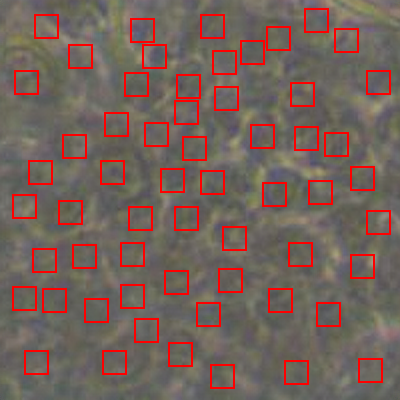

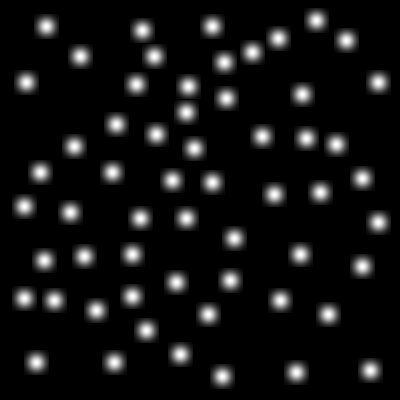

[[ 36 362]
 [ 24 298]
 [ 54 300]
 [ 96 310]
 [114 362]
 [146 330]
 [132 296]
 [180 354]
 [222 376]
 [208 314]
 [296 372]
 [280 300]
 [328 314]
 [362 266]
 [370 370]
 [300 254]
 [378 222]
 [230 280]
 [176 282]
 [132 254]
 [ 84 256]
 [ 44 260]
 [ 40 172]
 [ 24 206]
 [ 70 212]
 [112 172]
 [140 218]
 [172 180]
 [186 218]
 [212 182]
 [234 238]
 [274 194]
 [320 192]
 [336 144]
 [362 178]
 [306 138]
 [302  94]
 [262 136]
 [226  98]
 [194 148]
 [186 112]
 [156 134]
 [116 124]
 [ 74 146]
 [ 26  82]
 [ 80  56]
 [136  84]
 [142  30]
 [154  56]
 [188  86]
 [212  26]
 [224  62]
 [252  52]
 [278  38]
 [378  82]
 [346  40]
 [316  20]
 [ 46  26]]


In [12]:
sample_num = np.random.randint(low=0, high=len(img_list))
print(img_list[sample_num])
with h5py.File(proximity_map_path, 'r') as file:
    img = Image.fromarray(file.get('img/{:03d}'.format(sample_num))[:])
    pmap = file.get('pmap/{:03d}'.format(sample_num))[:]
    coords = file.get('xy/{:03d}'.format(sample_num))[:]
    
    
    pmap_rescale = pmap * (255./np.max(pmap))
    pmap_img = Image.fromarray(pmap_rescale.astype('uint8'), 'L')
    
    print(np.max(pmap), np.max(pmap_rescale), pmap_img.size, img.size)
    
    draw = ImageDraw.Draw(img)
    size = 12
    for coord in coords:
        draw.rectangle([coord[0] - size,
                        coord[1] - size,
                        coord[0] + size,
                        coord[1] + size], outline=(255), width=2)

    display(img)
    display(pmap_img)
    print(coords)
